# Q1

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from pyvis.network import Network
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

In [3]:
# 12831.edges file has the following format:
# <source> <destination>
# the grapgh is undirected
# find the max node id
# read the file and create the adjacecny matrix

# get source and destination nodes from the file
def get_source_destination(file_name):
    source_list = []
    destination_list = []
    with open(file_name, 'r') as f:
        for line in f:
            line = line.strip()
            source, destination = line.split(' ')
            source, destination = int(source), int(destination)
            source_list.append(source)
            destination_list.append(destination)
    return source_list, destination_list

# count the number of unique nodes in the file
def count_unique_nodes(source_list, destination_list):
    unique_nodes = set()
    for source, destination in zip(source_list, destination_list):
        unique_nodes.add(source)
        unique_nodes.add(destination)
    return len(unique_nodes)

# create a dictionary that assigns a unique id to each node in the order they occur
def get_node_id_dict(source_list, destination_list):
    node_dict = {}
    for source, destination in zip(source_list, destination_list):
        if source not in node_dict:
            node_dict[source] = len(node_dict)
        if destination not in node_dict:
            node_dict[destination] = len(node_dict)
    node_id_dict = {}
    for node, node_id in node_dict.items():
        node_id_dict[node_id] = node
    return node_id_dict, node_dict

source, destination = get_source_destination('12831.edges')
unique_nodes = count_unique_nodes(source, destination)
node_dict, node_id_dict = get_node_id_dict(source, destination)
print(node_dict,'\n', node_id_dict)

{0: 398874773, 1: 652193, 2: 18498878, 3: 14749606, 4: 14305022, 5: 8479062, 6: 22253, 7: 12741, 8: 15540222, 9: 14809096, 10: 7415132, 11: 14172562, 12: 17129553, 13: 13839772, 14: 15911247, 15: 14086492, 16: 14087951, 17: 57378470, 18: 19094625, 19: 19479427, 20: 1186, 21: 29294520, 22: 13462502, 23: 13652832, 24: 40198602, 25: 174958347, 26: 287713, 27: 2727051, 28: 1765921, 29: 14710479, 30: 8630562, 31: 20496869, 32: 180505807, 33: 1678471, 34: 663463, 35: 728163, 36: 3191321, 37: 17408993, 38: 765548, 39: 13141442, 40: 883301, 41: 9616792, 42: 1371101, 43: 13334762, 44: 19966557, 45: 12725022, 46: 9283582, 47: 14231571, 48: 713263, 49: 12800212, 50: 14450509, 51: 165964253, 52: 14, 53: 563200400, 54: 15236339, 55: 606083, 56: 104937383, 57: 14178728, 58: 20755177, 59: 14163141, 60: 57739496, 61: 12007182, 62: 17729005, 63: 10587552, 64: 377821426, 65: 9411772, 66: 17633994, 67: 15639334, 68: 1260231, 69: 668423, 70: 58166411, 71: 586, 72: 11178592, 73: 5994452, 74: 14471007, 75: 

In [4]:
# make an adjacency matrix
def get_adj_matrix(source_list, destination_list, node_id_dict):
    adjacency_matrix = np.zeros((unique_nodes, unique_nodes))
    for source, destination in zip(source_list, destination_list):
        source_id = node_id_dict[source]
        destination_id = node_id_dict[destination]
        adjacency_matrix[source_id, destination_id] = 1
    return adjacency_matrix

adjacency_matrix = get_adj_matrix(source, destination, node_id_dict)
print(adjacency_matrix)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print('Number of unique nodes: ', adjacency_matrix.shape[0])
print('Number of edges: ', np.sum(adjacency_matrix))
print('Average indegree: ', np.sum(adjacency_matrix, axis=0).mean())
print('Average outdegree: ', np.sum(adjacency_matrix, axis=1).mean())
print('Node with max indegree: ', node_dict[np.argmax(np.sum(adjacency_matrix, axis=0))])
print('Node with max outdegree: ',node_dict[np.argmax(np.sum(adjacency_matrix, axis=1))])
print('Density of network', np.sum(adjacency_matrix)/(adjacency_matrix.shape[0]*adjacency_matrix.shape[1]))

Number of unique nodes:  236
Number of edges:  2478.0
Average indegree:  10.5
Average outdegree:  10.5
Node with max indegree:  180505807
Node with max outdegree:  1186
Density of network 0.04449152542372881


In [6]:
def plot_degree_distribution(adjacency_matrix):
    indegree = np.sum(adjacency_matrix, axis=0)
    outdegree = np.sum(adjacency_matrix, axis=1)
    # plt.hist(indegree, bins=20, alpha=0.5, label='indegree', color= 'red')
    # plt.legend(loc='upper right')
    # plt.show()
    # plt.hist(outdegree, bins=20, alpha=0.5, label='outdegree', color = 'blue')
    # plt.legend(loc='upper right')
    # plt.show()
    # use plotly to plot the histogram
    df = pd.DataFrame({'indegree': indegree, 'outdegree': outdegree})
    fig = px.histogram(df, x="indegree", color="indegree", marginal="box", hover_data=df.columns)
    fig.show()
    fig = px.histogram(df, x="outdegree", color="outdegree", marginal="box", hover_data=df.columns)
    fig.show()

In [7]:
plot_degree_distribution(adjacency_matrix)

In [8]:
# Calculate the local clustering coefficient of each node and plot the clustering-coefficient
# distribution (lcc vs frequency of lcc) of the network.

def get_lcc(adjacency_matrix):
    lcc = np.zeros(adjacency_matrix.shape[0])
    for node in range(adjacency_matrix.shape[0]):
        # neighbours of node(neighbours are out neighbours)
        neighbors = np.where(adjacency_matrix[node, :] == 1)[0]
        if len(neighbors) == 0 or len(neighbors) == 1:
            lcc[node] = 0
        else:
            num_edges = 0
            for neighbor in neighbors:
                num_edges += np.sum(adjacency_matrix[neighbor, neighbors])
            lcc[node] = num_edges/(len(neighbors)*(len(neighbors)-1))
    return lcc

lcc = get_lcc(adjacency_matrix)

def plot_lcc_distribution(lcc):
    # plt.hist(lcc, bins=20, alpha=0.5, label='lcc', color= 'red')
    # plt.legend(loc='upper right')
    # plt.show()
    # use plotly to plot the histogram
    df = pd.DataFrame({'lcc': lcc})
    fig = px.histogram(df, x="lcc", color="lcc", marginal="box", hover_data=df.columns)
    fig.show()
    

plot_lcc_distribution(lcc)

# Q2

In [9]:
# pagerank score for each node

def get_pagerank_score(adjacency_matrix, d=0.85, tol = 1e-1, num_iterations=100):
    # initialize pagerank score
    n = adjacency_matrix.shape[0]
    pagerank_score = np.ones(n)/n
    for i in range(num_iterations):
        prev_pagerank_score = pagerank_score.copy()
        pagerank_score = d * np.dot(adjacency_matrix, prev_pagerank_score) + (1 - d) / n
        if np.sum(np.abs(pagerank_score - prev_pagerank_score)) < tol:
            break
    return pagerank_score

pagerank_score = get_pagerank_score(adjacency_matrix)

#print node with highest pagerank score
print(node_dict[np.argmax(pagerank_score)])
        

5854882


In [10]:
# calculate authourity and hub score for each node

def get_authority_hub_score(adjacency_matrix, num_iterations=1000):
    n = adjacency_matrix.shape[0]
    authority_score = np.ones(n)
    hub_score = np.ones(n)
    for i in range(num_iterations):
        prev_authority_score = authority_score.copy()
        prev_hub_score = hub_score.copy()
        authority_score = np.dot(adjacency_matrix.T, prev_hub_score)
        hub_score = np.dot(adjacency_matrix, prev_authority_score)
        authority_score = authority_score/np.linalg.norm(authority_score)
        hub_score = hub_score/np.linalg.norm(hub_score)
    return authority_score, hub_score

authority_score, hub_score = get_authority_hub_score(adjacency_matrix)

In [11]:
print('Node with max authority score: ', node_dict[np.argmax(authority_score)])
print('Node with max hub score: ', node_dict[np.argmax(hub_score)])

Node with max authority score:  14231571
Node with max hub score:  1186


In [12]:
#  make a file that stores source_id, destination_id but in the order of node_id_dict
def make_new_file(source_list, destination_list, node_id_dict):
    new_file = open('new_file.edges', 'w')
    for source, destination in zip(source_list, destination_list):
        source_id = node_id_dict[source]
        destination_id = node_id_dict[destination]
        new_file.write(str(source_id) + ' ' + str(destination_id))
        new_file.write('\n')
    new_file.close()

make_new_file(source, destination, node_id_dict)

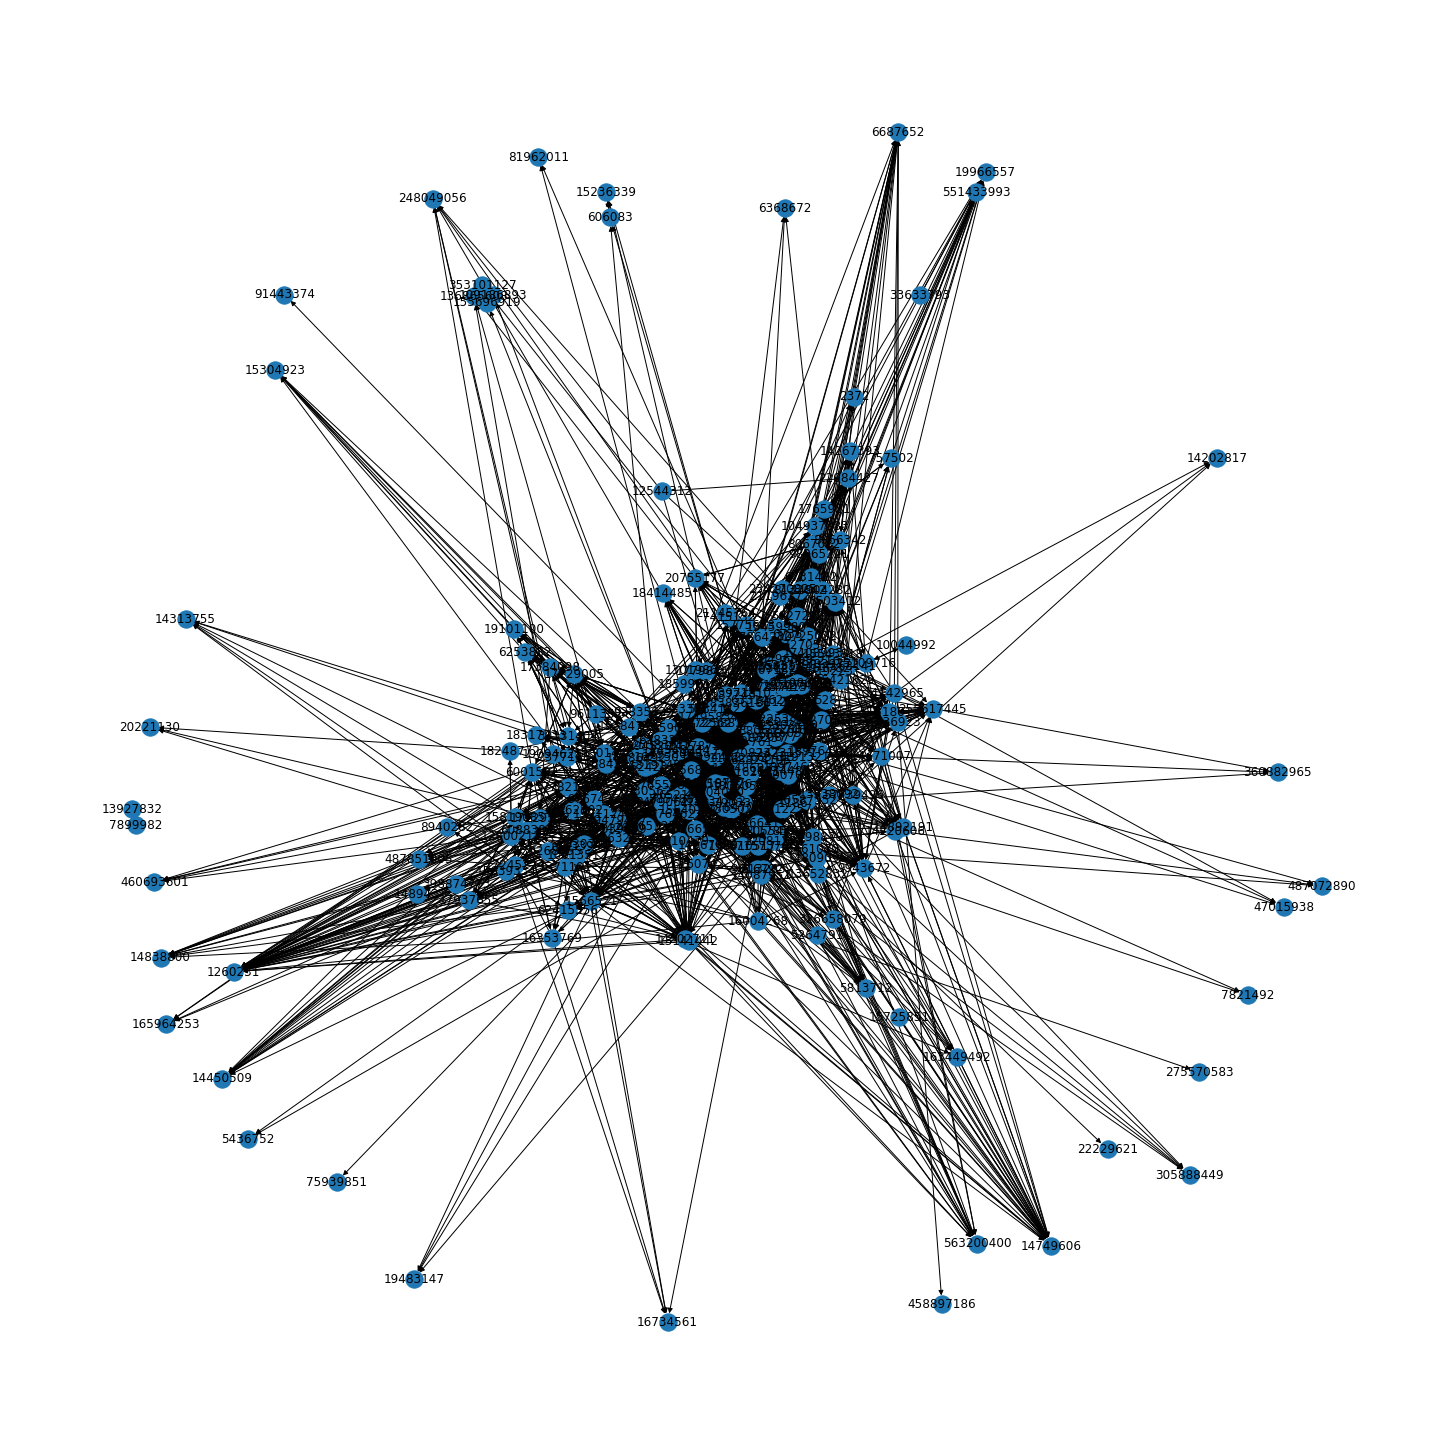

In [13]:
# make a graph using networkx
# edges are in new_file.edges

import networkx as nx

G = nx.read_edgelist('12831.edges', create_using=nx.DiGraph(), nodetype=int)

# plot the graph
plt.figure(figsize=(20,20))
nx.draw(G, with_labels=True)
plt.show()

In [21]:
def highest_any_score(score_dict):
    max_score = 0
    max_node = 0
    for node, score in score_dict.items():
        if score > max_score:
            max_score = score
            max_node = node
    return max_node

# get the pagerank, authority score and hub score for each node
pagerank_score = nx.pagerank(G, alpha=0.85, max_iter=1000, tol = 1e-8)
hub_score, authority_score = nx.hits(G, max_iter=1000, tol = 1e-8)

print('Node with max pagerank score: ', highest_any_score(pagerank_score))
print('Node with max authority score: ', highest_any_score(authority_score))
print('Node with max hub score: ', highest_any_score(hub_score))

Node with max pagerank score:  51518017
Node with max authority score:  14231571
Node with max hub score:  1186


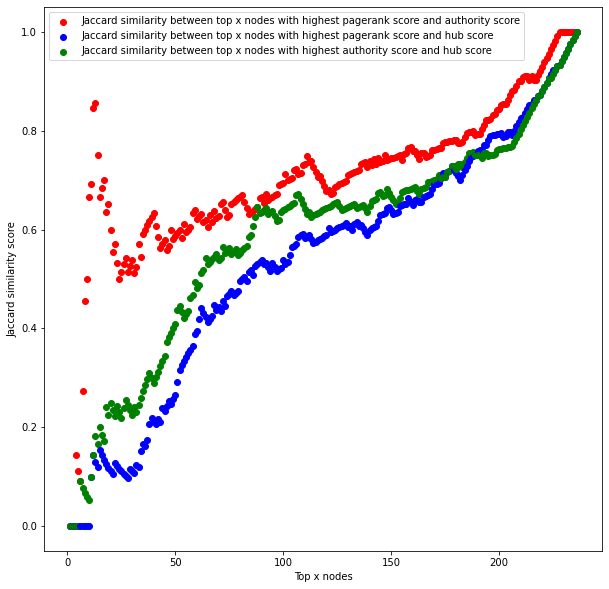

In [22]:
# calculate jaccard similarity between the top 1000 nodes with highest pagerank score, authority score and hub score
def get_top_x(score_dict, x):
    sorted_score = sorted(score_dict.items(), key=lambda item: item[1], reverse=True)
    top_x = []
    for i in range(x):
        top_x.append(sorted_score[i][0])
    return top_x
    
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection)/len(union)

plt.figure(figsize=(10,10))
#plot the jaccard similarity score
for i in range(1, 237):
    top_x_pagerank = get_top_x(pagerank_score, i)
    top_x_authority = get_top_x(authority_score, i)
    top_x_hub = get_top_x(hub_score, i)

    jaccard_pagerank_authority = jaccard_similarity(set(top_x_pagerank), set(top_x_authority))
    jaccard_pagerank_hub = jaccard_similarity(set(top_x_pagerank), set(top_x_hub))
    jaccard_authority_hub = jaccard_similarity(set(top_x_authority), set(top_x_hub))

    plt.scatter(i, jaccard_pagerank_authority, color='red')
    plt.scatter(i, jaccard_pagerank_hub, color='blue')
    plt.scatter(i, jaccard_authority_hub, color='green')

plt.xlabel('Top x nodes')
plt.ylabel('Jaccard similarity score')
plt.legend(['Jaccard similarity between top x nodes with highest pagerank score and authority score', 'Jaccard similarity between top x nodes with highest pagerank score and hub score', 'Jaccard similarity between top x nodes with highest authority score and hub score'])
plt.show()

In [16]:
pagerank_score = np.array(list(pagerank_score.values()))
hub_score = np.array(list(hub_score.values()))
authority_score = np.array(list(authority_score.values()))

norm_pagerank_score = (pagerank_score - np.mean(pagerank_score))/np.std(pagerank_score)
norm_hub_score = (hub_score - np.mean(hub_score))/np.std(hub_score)
norm_authority_score = (authority_score - np.mean(authority_score))/np.std(authority_score)

In [17]:
# plt.figure(figsize=(20,10))
# plt.scatter(np.arange(len(pagerank_score)), norm_pagerank_score, label='pagerank score')
# plt.scatter(np.arange(len(hub_score)), norm_hub_score, label='hub score')
# plt.scatter(np.arange(len(authority_score)), norm_authority_score, label='authority score')
# plt.legend(loc='upper right')
# plt.show()

# plot the scatter score vs index use plotly increse the size of the plot

df = pd.DataFrame({'pagerank_score': norm_pagerank_score, 'hub_score': norm_hub_score, 'authority_score': norm_authority_score})
fig = px.scatter(df, x=df.index, y=["pagerank_score", "hub_score", "authority_score"])
fig.show()

In [19]:
# find correlation between normalized pagerank score, hub score and authority score
print('Correlation between normalized pagerank score and hub score: ', np.corrcoef(norm_pagerank_score, norm_hub_score)[0,1])
print('Correlation between normalized pagerank score and authority score: ', np.corrcoef(norm_pagerank_score, norm_authority_score)[0,1])
print('Correlation between normalized hub score and authority score: ', np.corrcoef(norm_hub_score, norm_authority_score)[0,1])

Correlation between normalized pagerank score and hub score:  0.4076778442854586
Correlation between normalized pagerank score and authority score:  0.847895690607122
Correlation between normalized hub score and authority score:  0.5742361441822412
